На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [59]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t, kstest, shapiro, ttest_ind
import statsmodels.api as sm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn ('DelftStack')
warnings.warn ('Do not show this message')

## Загрузим данные из файла

In [6]:
df = pd.read_excel('AB_Test_Results (2).xlsx')
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [31]:
df.head(100)

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
3,4,variant,0.0
4,5,variant,0.0
5,6,variant,0.0
6,9,variant,0.0
...,...,...,...
145,197,variant,0.0
146,198,variant,0.0
147,200,control,0.0
148,201,control,0.0


## Очистим данные от дублей:

In [33]:
df = df.groupby(['USER_ID', 'VARIANT_NAME']).agg({'REVENUE':'sum'})
df.reset_index(inplace=True)
df.drop_duplicates('USER_ID', keep=False, inplace=True)
df.shape

(4783, 3)

## Анализ данных

In [34]:
df.describe()

,USER_ID,REVENUE
count,4783.000000,4783.000000
mean,4994.395777,0.135873
std,2898.618472,3.011392
min,2.000000,0.000000
25%,2476.000000,0.000000
50%,4975.000000,0.000000
75%,7515.000000,0.000000
max,9998.000000,196.010000


In [35]:
control = df[df['VARIANT_NAME'] == 'control']
testgroup = df[df['VARIANT_NAME'] == 'variant']
print(f"Контрольная группа: {control.count()[0]} Тестовая группа: {testgroup.count()[0]}")

Контрольная группа: 2390 Тестовая группа: 2393


### Описателбная статистика по каждой группе в отдельности

In [37]:
control.describe()

,USER_ID,REVENUE
count,2390.000000,2390.000000
mean,5020.881590,0.196887
std,2904.850992,4.172201
min,2.000000,0.000000
25%,2517.250000,0.000000
50%,5012.500000,0.000000
75%,7616.000000,0.000000
max,9998.000000,196.010000


In [38]:
testgroup.describe()

,USER_ID,REVENUE
count,2393.000000,2393.000000
mean,4967.943168,0.074935
std,2892.745368,0.858207
min,4.000000,0.000000
25%,2435.000000,0.000000
50%,4955.000000,0.000000
75%,7379.000000,0.000000
max,9995.000000,23.040000


In [18]:
import plotly.express as px
import plotly.io as pio


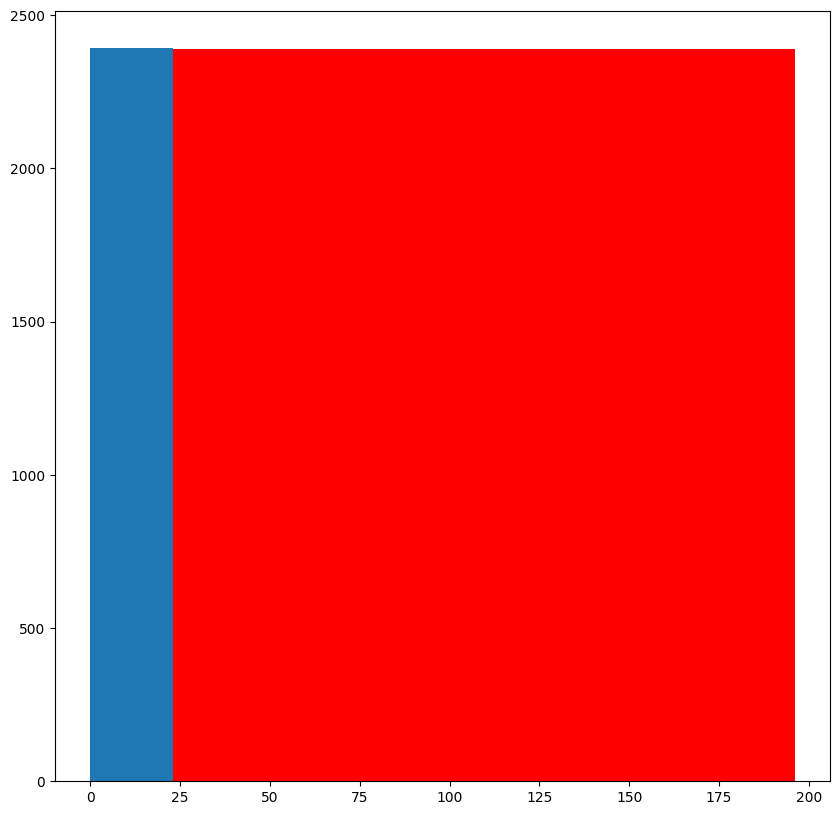

In [42]:
plt.figure(figsize=(10, 10))
control_revenue = df['REVENUE'][df['VARIANT_NAME'] == 'control']
testgroup_revenue = df['REVENUE'][df['VARIANT_NAME'] == 'variant']
plt.hist (control_revenue, color='r', bins = 1)
plt.hist (testgroup_revenue, bins = 1)
plt.show()

## Проверяем выборки на нормальность распределения
### тест Колмогорова-Смирнова

In [55]:
print(kstest(control_revenue, "norm"))
print(kstest(testgroup_revenue, "norm"))

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)


Вывод: pvalue меньше альфа, отвергаем нулевую гипотезу, т.е. данные распределены не нормально

### Тест Шапиро-Уилка

In [66]:
import scipy.stats as st

In [71]:
from scipy.stats import shapiro
st.shapiro(control_revenue)

ShapiroResult(statistic=0.021338164806365967, pvalue=0.0)

In [72]:
st.shapiro(testgroup_revenue)

ShapiroResult(statistic=0.06145977973937988, pvalue=0.0)

Вывод: pvalue меньше альфа, отвергаем нулевую гипотезу, т.е. данные распределены не нормально

## Проверяем различия между группами
### Расчет стат значимости, непараметрический тест Манна-Уитни

In [56]:
from scipy.stats import mannwhitneyu
mannwhitneyu(control_revenue, testgroup_revenue)

MannwhitneyuResult(statistic=2874161.0, pvalue=0.2104875008271777)

Вывод: pvalue больше альфа 0,05, принимаем нулевую гипотезу, т.е. значимых различий между группами нет

In [52]:
ttest_ind(control_revenue, testgroup_revenue, equal_var = False)

TtestResult(statistic=1.3996978409515475, pvalue=0.16172355638776942, df=2590.554714694372)

Вывод: pvalue больше альфа 0,05, принимаем нулевую гипотезу, т.е. значимых различий между группами нет

РЕКОМЕНДАЦИИ:
На основе проведенных выше тестов можно сделать вывод о том, что контрольная и тестовая группы не имеют статистически значимых отличий. Следовательно, не имеет смысла распространять изменения на всех пользователей.  
Необходимо искать другие гипотезы для увеличения дохода. 